In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import datetime as dt

In [2]:
# open original dataset with eddies
ifile = 'cycloniceddies.nc'
ds1 = Dataset(ifile)
# load some data
lon = ds1['lon'][:].data
lat = ds1['lat'][:].data
yyy = ds1['year'][:].data.astype(int)
mmm = ds1['month'][:].data.astype(int)
ddd = ds1['day'][:].data.astype(int)

In [3]:
# open the generated file with chlorophyll
ds2 = np.load(ifile + '.npz')['chlor_a']

Valid eddies: 5368


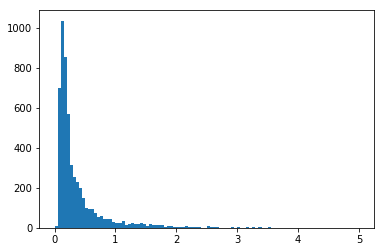

In [4]:
# plot histogram of all valid CHL

# select valid records (where number of pixels from OC CCI product is more than zero)
valid = ds2['sample_size'] > 0
# plot histogram of MEAN chlor_a
h = plt.hist(ds2['mean'][valid], 100, [0, 5])
print('Valid eddies:', len(ds2['mean'][valid]))

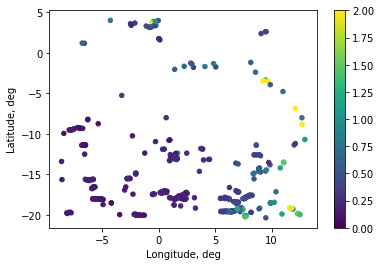

In [5]:
# PLOT median chl in july
# boolean index of valid chl averages in all julies
idx = (ds2['sample_size'] > 0) * (mmm == 7)
# make scatter plot
plt.scatter(lon[idx], lat[idx], 20, ds2['median'][idx], vmin=0, vmax=2)
plt.colorbar()
xl = plt.xlabel('Longitude, deg')
yl = plt.ylabel('Latitude, deg')

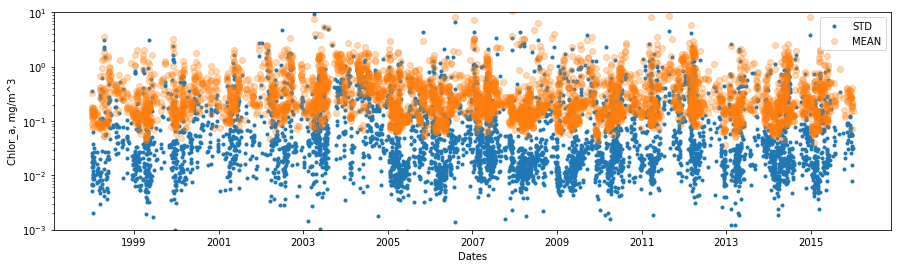

In [6]:
# PLOT time series of mean and std from all valid eddies

# select valid eddies only
valid = ds2['sample_size'] > 0
# generate list of valid dates
dates = [dt.datetime(y,m,d) for y,m,d in zip(yyy[valid], mmm[valid], ddd[valid])]

f = plt.figure(figsize=(15,4))
plt.semilogy(dates, ds2['std'][valid], '.')
plt.semilogy(dates, ds2['mean'][valid], 'o', alpha=0.3)

plt.ylim([1e-3, 1e1])
plt.xlabel('Dates')
plt.ylabel('Chlor_a, mg/m^3')
plt.legend(['STD', 'MEAN'])